# Metodología CRISP-DM

**CRISP-DM** (Cross-Industry Standard Process for Data Mining) es una metodología que sirve como guía o marco de referencia para llevar a cabo proyectos de minería de datos y ciencia de datos. No es un algoritmo, sino un conjunto de fases y buenas prácticas para estructurar el trabajo y asegurar que el proyecto sea exitoso y manejable.

Se compone de seis fases principales que, aunque se presentan en orden, son iterativas y no siempre estrictamente secuenciales:

---

### 1. Comprensión del Negocio (Business Understanding)
Es la fase inicial. Se enfoca en entender los objetivos del negocio, determinar qué problema se quiere resolver y definir un plan de proyecto para alcanzar las metas de minería de datos.


#### Objetivo del Proyecto

- **Tema:** Análisis y predicción de la fuga o **abandono de clientes** (**Churn**) en la industria de telecomunicaciones.
- **Meta Principal:** Desarrollar un modelo de Machine Learning capaz de identificar a los clientes con **alta probabilidad de abandono** (valor "Yes" en la columna `Churn`) con suficiente antelación para permitir acciones de retención.


### 2. Contexto e Importancia del Churn

El abandono de clientes es un problema crítico en la industria Telco (telecomunicaciones) debido a la alta competencia y la baja barrera de entrada para cambiar de proveedor.

- **Costo de Adquisición vs. Retención:** Adquirir un nuevo cliente es significativamente **más costoso** (5 a 25 veces más) que retener uno existente.
- **Impacto Financiero:** Una pequeña reducción en la tasa de churn puede tener un **impacto masivo** en los ingresos anuales y la rentabilidad de la empresa.

**Pregunta Clave del Negocio:** ¿Qué factores están causando que nuestros clientes decidan abandonar el servicio, y cómo podemos predecirlos para intervenir proactivamente?

<div style="text-align:center; margin: 8px 0;">
  <img src="../imgs/licensed-image.jpeg" alt="Risk Matrix" style="width:60%; max-width:420px; height:auto; border-radius:4px;" />
</div> <!-- Imagen centrada y redimensionada -->

### 3. Definición del Problema de Datos

#### Tipo de Problema

- **Problema de Clasificación Binaria:** El modelo debe clasificar a cada cliente en una de dos categorías:
  - **Clase 0 (Negativa):** El cliente **NO** abandona el servicio.
  - **Clase 1 (Positiva):** El cliente **SÍ** abandona el servicio (**Churn**).

#### Definición de la Variable Objetivo

- **Variable Objetivo:** `Churn` (valores: `Yes` / `No`).

#### Criterios de Éxito del Proyecto (Métricas)

Para que el modelo sea útil para el negocio, nos enfocaremos en:

1. **Recall (Sensibilidad):** Priorizar la detección de clientes que realmente abandonarán. Es preferible tener falsos positivos (marcar como riesgo a un cliente que no abandona) que falsos negativos (no detectar a un cliente que sí abandona).
2. **ROC AUC Score:** Métrica robusta para problemas con clases desbalanceadas; mide la capacidad del modelo para discriminar entre las dos clases.

### 4. Alcance y Recursos

#### Datos Utilizados

- **Fuente:** Dataset de Churn de clientes de Telco (incluye datos demográficos, servicios contratados, información de cuenta y pagos).
- **Periodo:** Instantánea del dataset con 7043 clientes.

---



### 2. Comprensión de los Datos (Data Understanding)
En esta etapa se recopilan los datos iniciales y se exploran para familiarizarse con ellos. Se identifican problemas de calidad, se descubren patrones preliminares y se formulan hipótesis.

#### a. Carga de librerías y datos

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset. Usamos header=0 para asegurar la lectura correcta de los encabezados.
FILE_PATH = '../02_Data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(FILE_PATH, header=0) 

print(f"Dataset cargado con {len(df)} filas.")

Dataset cargado con 7043 filas.


#### b. Exploración inicial y calidad de datos

In [106]:
# A. Visualización de las primeras filas y los nombres de las columnas
print("\n--- A. Primeras 5 filas ---")
print(df.head())

print("\n--- B. Nombres de Columnas Originales y su Conteo ---")
print(df.columns.tolist())
print(f"Número de columnas: {len(df.columns)}")

# C. Información General (tipos de datos y nulos)
print("\n--- C. df.info() (Tipos de datos y Nulos) ---")
print(df.info())

# NOTA IMPORTANTE: Observamos que 'TotalCharges' se lee como 'object' (string),
# lo cual es incorrecto, y que hay nulos (non-null count < total rows). Esto será corregido en la Fase 3.


--- A. Primeras 5 filas ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

#### c. Análisis de la variable objetivo y descriptivo


--- D. Nombres estandarizados para análisis ---
['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']

--- E. Estadísticas Descriptivas ---
        customerid gender  seniorcitizen partner dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        N

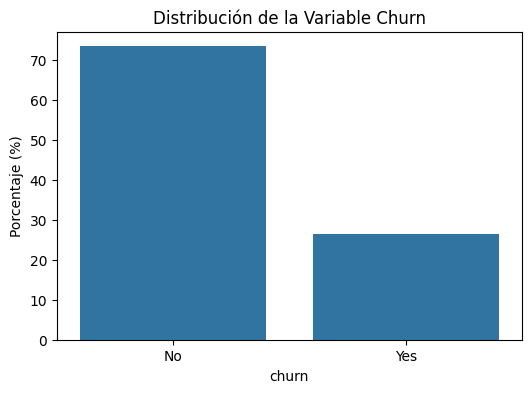

In [107]:
# D. Estandarización de nombres (paso crucial para evitar KeyErrors)
# Hacemos esto aquí para poder acceder a las columnas sin problemas
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print("\n--- D. Nombres estandarizados para análisis ---")
print(df.columns.tolist())

# E. Estadísticas Descriptivas (Numéricas y Categóricas)
print("\n--- E. Estadísticas Descriptivas ---")
print(df.describe(include='all'))

# F. Análisis de la Variable Objetivo ('churn')
churn_distribution = df['churn'].value_counts(normalize=True) * 100
print(f"\n--- F. Distribución de Churn ---\n{churn_distribution}")

# Visualización de la distribución
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_distribution.index, y=churn_distribution.values)
plt.title('Distribución de la Variable Churn')
plt.ylabel('Porcentaje (%)')
plt.show()

# CONCLUSIÓN DE COMPRENSIÓN: Hay un desbalance de clases (aproximadamente 73% No vs 27% Yes).
# También detectamos que 'totalcharges' es 'object' (string). Estos problemas se abordan en la Fase 3.

### 3. Preparación de los Datos (Data Preparation)
Es la fase más laboriosa. Consiste en construir el conjunto de datos final que se usará para los modelos. Incluye tareas como la limpieza de datos, el manejo de valores nulos, la transformación de variables y la creación de nuevas características (feature engineering).

#### a. Limpieza y Transformación de Calidad

In [108]:
import os
from sklearn.preprocessing import StandardScaler

# --- PASO CRUCIAL: RE-ESTANDARIZACIÓN DE NOMBRES ---
# Esto garantiza que el DataFrame esté limpio incluso si las celdas anteriores no se ejecutaron.
print("1. Aplicando estandarización de nombres (minúsculas, snake_case)...")
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print(f"Nombres estandarizados: {df.columns.tolist()}")

# Definir variables estandarizadas
COLUMNA_CLIENTE = 'customerid'
COLUMNA_CARGOS = 'totalcharges'
COLUMNA_CHURN = 'churn'
PROCESSED_DIR = '02_Data/processed'
PROCESSED_FILE_NAME = 'telco_churn_processed.csv'
PROCESSED_FILE_PATH = os.path.join(PROCESSED_DIR, PROCESSED_FILE_NAME)

print("\n2. INICIO DE LIMPIEZA Y TRANSFORMACIÓN...")

# A. Eliminar la columna no relevante (customerid)
df.drop(COLUMNA_CLIENTE, axis=1, inplace=True) 
print(f"- Columna '{COLUMNA_CLIENTE}' eliminada.")

# B. Manejar 'totalcharges'
df[COLUMNA_CARGOS] = pd.to_numeric(df[COLUMNA_CARGOS], errors='coerce')
df.dropna(subset=[COLUMNA_CARGOS], inplace=True) 
print(f"- Nulos en '{COLUMNA_CARGOS}' eliminados. Filas restantes: {len(df)}")


# C. Codificación de la variable objetivo (Churn: Yes/No a 1/0)
df[COLUMNA_CHURN] = df[COLUMNA_CHURN].map({'Yes': 1, 'No': 0})
print("- Variable 'churn' codificada (1/0).")

1. Aplicando estandarización de nombres (minúsculas, snake_case)...
Nombres estandarizados: ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']

2. INICIO DE LIMPIEZA Y TRANSFORMACIÓN...
- Columna 'customerid' eliminada.
- Nulos en 'totalcharges' eliminados. Filas restantes: 7032
- Variable 'churn' codificada (1/0).


#### b. Codificación y Escalamiento

In [109]:
# D. Unificar valores categóricos (soluciona 'KeyError: multiplelines')
cols_to_simplify = ['multiplelines', 'onlinesecurity', 'onlinebackup', 
                    'deviceprotection', 'techsupport', 'streamingtv', 
                    'streamingmovies']

for col in cols_to_simplify:
    # Usamos 'no internet service' y 'no phone service' en minúsculas debido a la estandarización previa.
    df[col] = df[col].replace('no internet service', 'no')
    df[col] = df[col].replace('no phone service', 'no')
print("- Valores de servicios unificados (e.g., 'no internet service' -> 'no').")

# E. Codificación One-Hot para el resto de variables categóricas
df = pd.get_dummies(df, drop_first=True)
print("- Variables categóricas codificadas (One-Hot).")

# F. Escalamiento de Variables Numéricas
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("- Variables numéricas escaladas.")

- Valores de servicios unificados (e.g., 'no internet service' -> 'no').
- Variables categóricas codificadas (One-Hot).
- Variables numéricas escaladas.


#### c. Guardar el Dataset Procesado

In [110]:
import os

# --- CÓDIGO CORREGIDO PARA EL MANEJO DE RUTAS ---

# La notación '..' le dice a Python que suba un nivel de directorio (de 01_Notebooks a telco_churn_project)
PROCESSED_DIR = os.path.join('..', '02_Data', 'processed') 
PROCESSED_FILE_NAME = 'telco_churn_processed.csv'
PROCESSED_FILE_PATH = os.path.join(PROCESSED_DIR, PROCESSED_FILE_NAME)

# --- Verificar la creación del directorio y guardado ---

# 1. Asegurarse de que el directorio de destino exista
# 'exist_ok=True' previene errores si la carpeta ya está ahí.
os.makedirs(PROCESSED_DIR, exist_ok=True) 

print(f"\nDirectorio verificado/creado: {os.path.abspath(PROCESSED_DIR)}")

# 2. Guardar el DataFrame transformado
df.to_csv(PROCESSED_FILE_PATH, index=False)

print(f"\n--- TRANSICIÓN FINALIZADA ---")
print(f"Archivo guardado exitosamente en: {PROCESSED_FILE_PATH}")


Directorio verificado/creado: c:\Users\escob\OneDrive\Documentos\Univalle\7° Semestre 2025 II\CienciaDatos\Proyectos\p4\Proyecto4-CienciaDatos\telco_churn_project\02_Data\processed

--- TRANSICIÓN FINALIZADA ---
Archivo guardado exitosamente en: ..\02_Data\processed\telco_churn_processed.csv
